In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = "2024_cleaned_personal_property_list.csv"  # Update this path accordingly
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df


,AGENCY_CODE,STATE_AGENCY,PROPERTY_TYPE,PROPERTY_CLASSIFICATION,PROPERTY_NAME,DATE_ACQUIRED_OR_INSTALLED,VALUE_OR_COST,IT_OR_NON-IT
0,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,NaN,Receptionist Desk,2010-09-21,2695.74,NON-IT
1,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,NaN,Mail Room Area,2010-09-15,4688.00,NON-IT
2,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,NaN,"Desk:Desks And Tables, Wood",2019-01-31,2822.84,NON-IT
3,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,NaN,Printer,2006-03-24,520.00,IT
4,20.0,OKLAHOMA ACCOUNTANCY BOARD,PERSONAL PROPERTY,NaN,Document Scanner,2011-02-28,6475.00,IT
...,...,...,...,...,...,...,...,...
95133,980.0,GRAND RIVER DAM AUTHORITY,PERSONAL PROPERTY,OWNED,"82"" Root Grapple For 80"" Brushcat (Hf)",2021-05-31,3641.92,NON-IT
95134,980.0,GRAND RIVER DAM AUTHORITY,PERSONAL PROPERTY,OWNED,Grasshopper 400D 1.3L-61 Mid-Mount Lawnmower-(For,2022-09-30,21784.86,NON-IT
95135,980.0,GRAND RIVER DAM AUTHORITY,PERSONAL PROPERTY,OWNED,2023 Grasshopper Lawnmower (900D 1.3L/3472Pf),2022-10-31,19699.83,NON-IT
95136,980.0,GRAND RIVER DAM AUTHORITY,PERSONAL PROPERTY,OWNED,2023 Grasshopper Lawnmower Deck (3472Pf) 3472H...,2022-10-31,4490.04,NON-IT


In [3]:
### DESCRIPTIVE ANALYSIS ###
print("Total number of records in the dataset:", len(df))
print("Unique state agencies:", df['STATE_AGENCY'].nunique())
print("Most common property types:")
print(df['PROPERTY_TYPE'].value_counts().head(10))
print("\nProperty classification distribution:")
print(df['PROPERTY_NAME'].value_counts())
print("\nIT vs Non-IT distribution:")
print(df['IT_OR_NON-IT'].value_counts())

Total number of records in the dataset: 95138
Unique state agencies: 122
Most common property types:
PROPERTY_TYPE
PERSONAL PROPERTY    95138
Name: count, dtype: int64

Property classification distribution:
PROPERTY_NAME
Laptop                                       999
Desktop                                      749
Radar, Stalker Dual Dsr 2X, Counting Unit    471
Radar, Stalker Dual Dsr 2X, Antenna          440
Computer                                     432
                                            ... 
Multi-Loader Compression Machi                 1
Industrial Power Generator                     1
Storage Tank 5150 Gallon                       1
Fluke Thermo-Hygrometer                        1
Lawnmower (400D-1.3L W/61" Deck)               1
Name: count, Length: 62640, dtype: int64

IT vs Non-IT distribution:
IT_OR_NON-IT
NON-IT    51446
IT        43692
Name: count, dtype: int64


In [4]:
### FINANCIAL ANALYSIS ###
# Convert Value or Cost to numeric
df['VALUE_OR_COST'] = pd.to_numeric(df['VALUE_OR_COST'], errors='coerce')

In [5]:
print("\nTotal value of all properties:", df['VALUE_OR_COST'].sum())
print("Average cost of IT properties:", df[df['IT_OR_NON-IT'] == 'IT']['VALUE_OR_COST' ].mean())
print("Average cost of Non-IT properties:", df[df['IT_OR_NON-IT'] == 'NON-IT']['VALUE_OR_COST'].mean())


Total value of all properties: 2413066881.3199997
Average cost of IT properties: 13061.089550476629
Average cost of Non-IT properties: 35922.02601448993


In [6]:
# Most expensive property
most_expensive = df.loc[df['VALUE_OR_COST'].idxmax()]
print("Most expensive property:", most_expensive['PROPERTY_NAME'], "- Value:", most_expensive['VALUE_OR_COST'])

# Agency with the highest total property value
top_agency = df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().idxmax()
print("Agency with highest total property value:", top_agency)

Most expensive property: Core Software Implementation - Value: 36480515.1
Agency with highest total property value: UNIVERSITY OF OKLAHOMA


In [7]:
### CATEGORICAL ANALYSIS ###
print("\nTop 10 most frequently occurring property names:")
print(df['PROPERTY_NAME'].value_counts().head(10))
print("Agencies with the most diverse range of property types:")
print(df.groupby('STATE_AGENCY')['PROPERTY_TYPE'].nunique().sort_values(ascending=False).head(10))


Top 10 most frequently occurring property names:
PROPERTY_NAME
Laptop                                       999
Desktop                                      749
Radar, Stalker Dual Dsr 2X, Counting Unit    471
Radar, Stalker Dual Dsr 2X, Antenna          440
Computer                                     432
Trailer                                      370
Truck                                        349
No Description                               330
Printer                                      323
Snow Plow                                    312
Name: count, dtype: int64
Agencies with the most diverse range of property types:
STATE_AGENCY
ABLE COMMISSION                              1
REGIONAL UNIVERSITY SYSTEM                   1
REDLANDS COMMUNITY COLLEGE                   1
REAL ESTATE COMMISSION                       1
PSYCHOLOGISTS EXAMINERS BOARD                1
PROFESSIONAL ENGINEERS AND LAND SURVEYORS    1
POLICE PENSION AND RETIREMENT SYSTEM         1
PANHANDLE STATE UNIVER

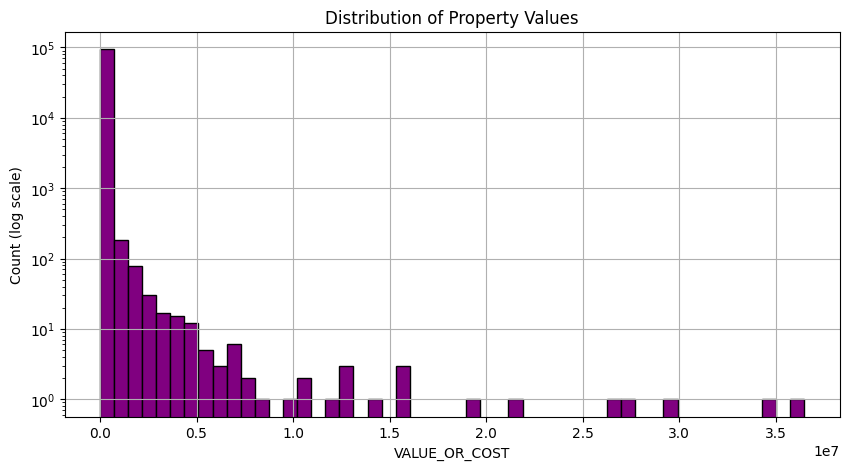

In [8]:
### DATA VISUALIZATION ###
# Histogram of property values
plt.figure(figsize=(10,5))
df['VALUE_OR_COST'].dropna().hist(bins=50, color='purple', edgecolor='black')
plt.yscale('log')
plt.title("Distribution of Property Values")
plt.xlabel("VALUE_OR_COST")
plt.ylabel("Count (log scale)")
plt.show()

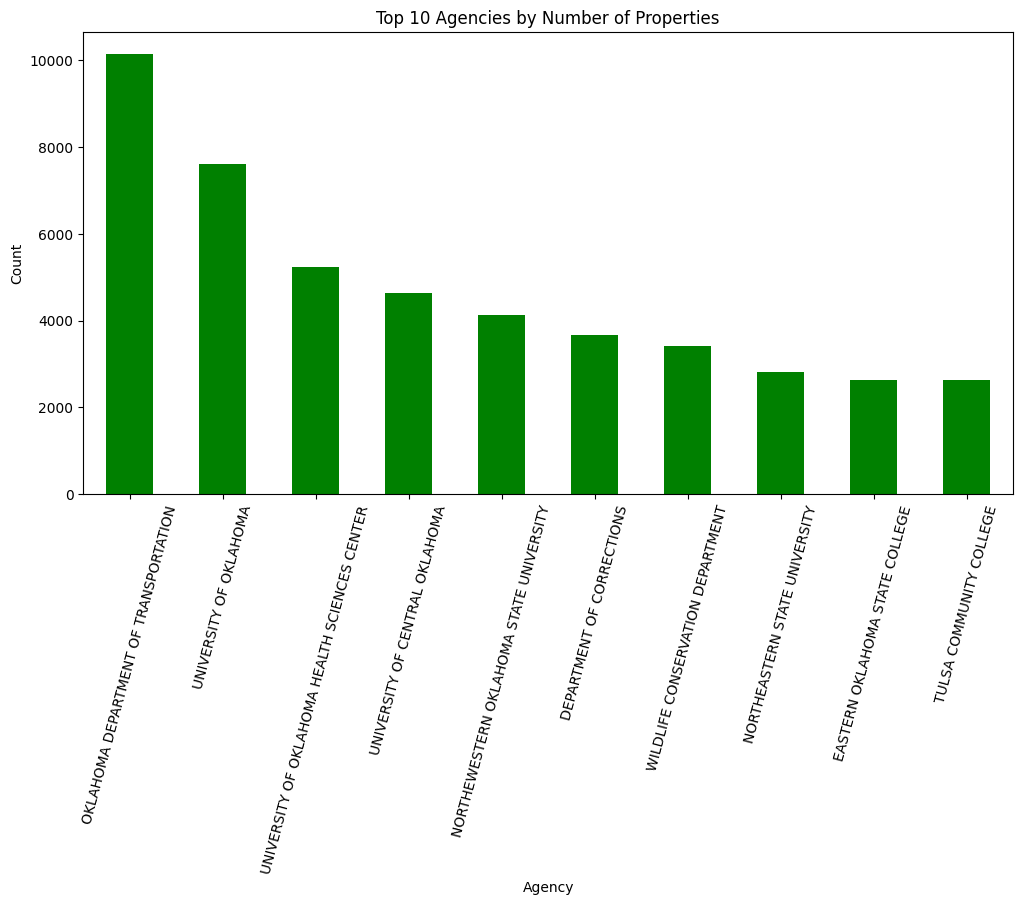

In [9]:
# Properties per agency (top 10)
plt.figure(figsize=(12,6))
df['STATE_AGENCY'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Agencies by Number of Properties")
plt.xlabel("Agency")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

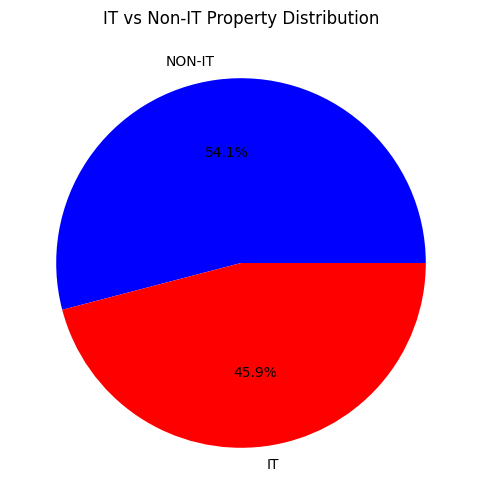

In [10]:
# IT vs Non-IT properties
plt.figure(figsize=(6,6))
df['IT_OR_NON-IT'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("IT vs Non-IT Property Distribution")
plt.ylabel("")
plt.show()

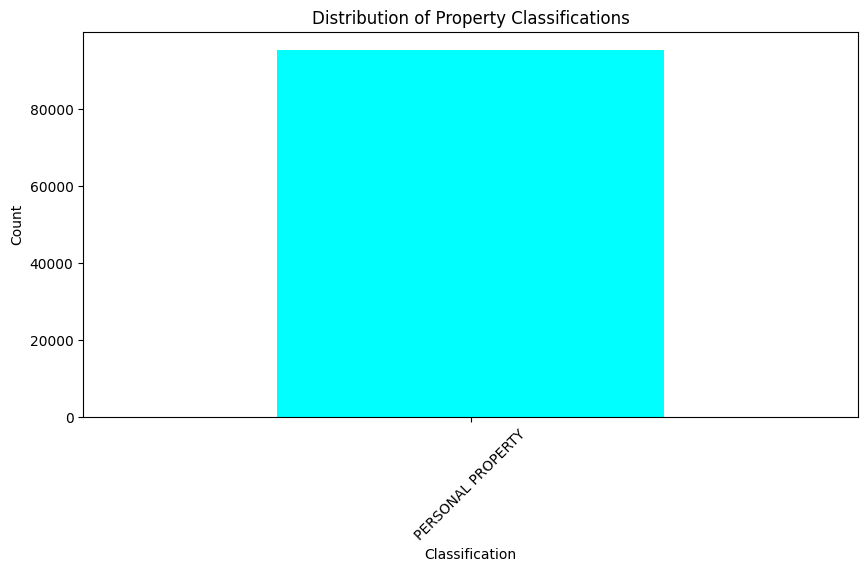

In [11]:
# Property Classification Distribution
plt.figure(figsize=(10,5))
df['PROPERTY_TYPE'].value_counts().plot(kind='bar', color='cyan')
plt.title("Distribution of Property Classifications")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

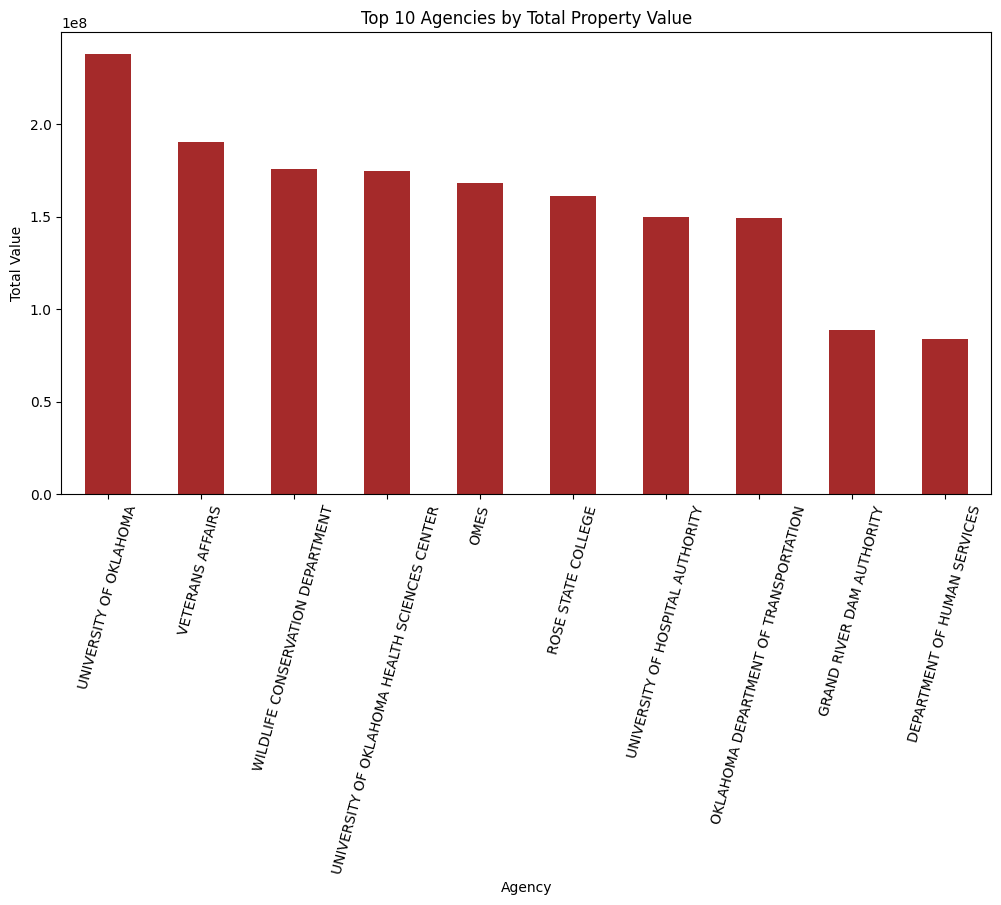

In [12]:
# Top agencies by total property value
plt.figure(figsize=(12,6))
df.groupby('STATE_AGENCY')['VALUE_OR_COST'].sum().nlargest(10).plot(kind='bar', color='brown')
plt.title("Top 10 Agencies by Total Property Value")
plt.xlabel("Agency")
plt.ylabel("Total Value")
plt.xticks(rotation=75)
plt.show()

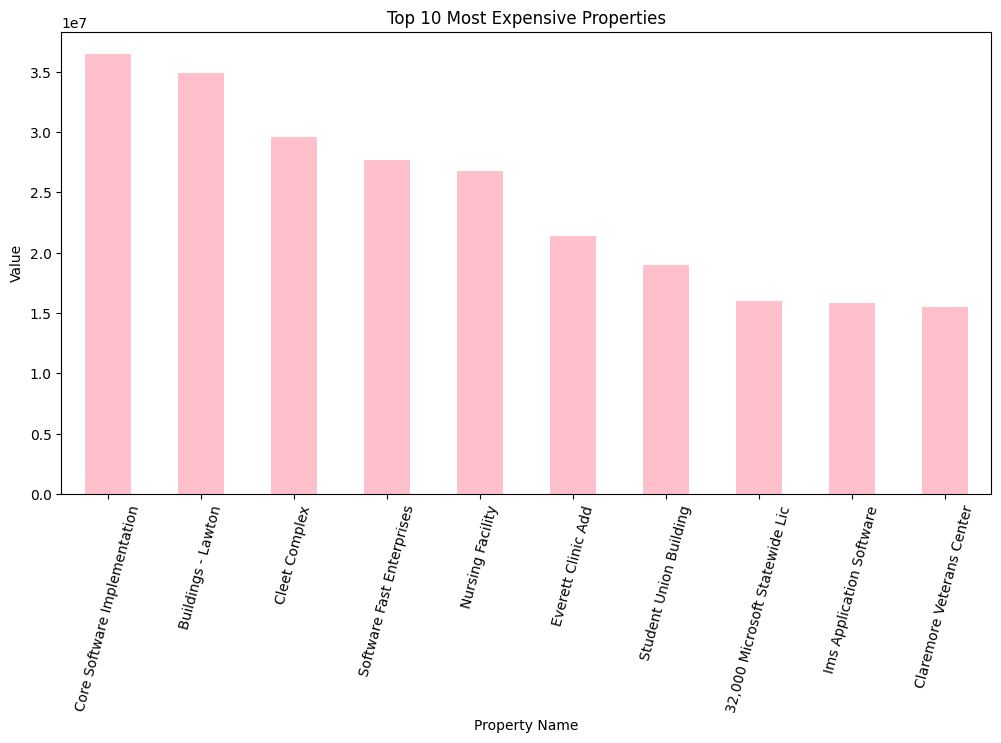

In [13]:
# Top 10 most expensive properties
plt.figure(figsize=(12,6))
df.nlargest(10, 'VALUE_OR_COST').set_index('PROPERTY_NAME')['VALUE_OR_COST'].plot(kind='bar', color='pink')
plt.title("Top 10 Most Expensive Properties")
plt.xlabel("Property Name")
plt.ylabel("Value")
plt.xticks(rotation=75)
plt.show()

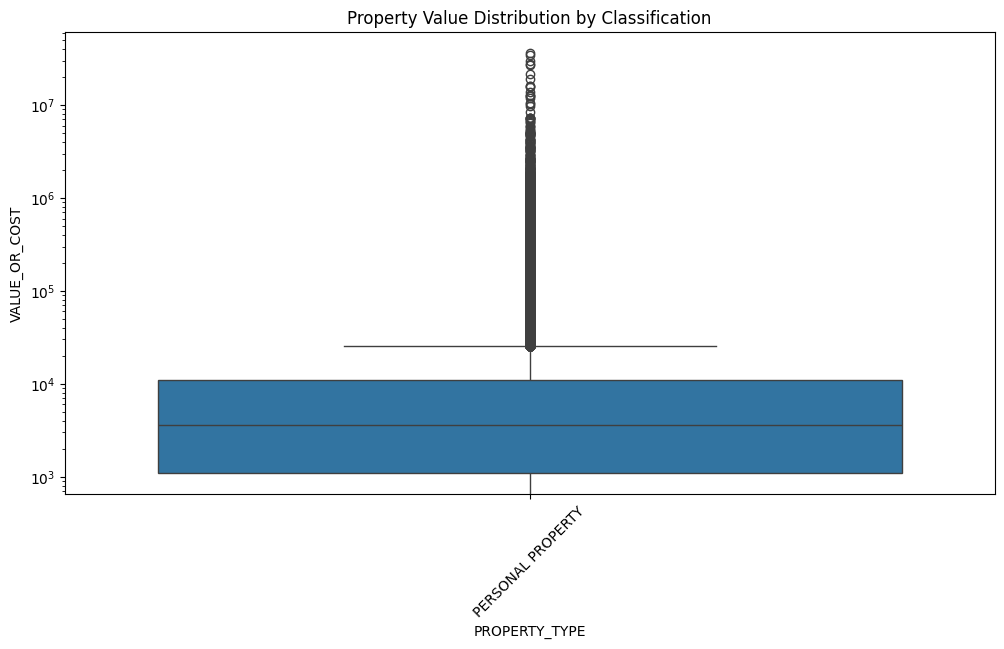

In [14]:
# Box plot of property value by classification
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='PROPERTY_TYPE', y='VALUE_OR_COST')
plt.yscale("log")
plt.title("Property Value Distribution by Classification")
plt.xticks(rotation=45)
plt.show()

In [15]:
print("\nAnalysis completed.")


Analysis completed.
